# 결정 트리

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 로지스틱 회귀로 와인 분류하기

In [ ]:
import pandas as pd # pandas 라이브러리를 불러옴 > pd로 줄여서 사용

wine = pd.read_csv('https://bit.ly/wine-date') # wine 데이터를 불러옴 > wine 변수에 저장 

In [3]:
wine.head() # wine 데이터의 상위 5개를 출력

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [4]:
wine.info() # wine 데이터의 정보를 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine.describe() # wine 데이터의 기술통계를 출력

alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000

In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy() # wine 데이터에서 alcohol, sugar, pH 열을 추출하여 data 변수에 저장
target = wine['class'].to_numpy() # wine 데이터에서 alcohol, sugar, pH, class 열을 추출하여 data, target 변수에 저장

In [ ]:
from sklearn.model_selection import train_test_split # sklearn 라이브러리에서 train_test_split 함수를 불러옴

train_input, test_input, train_target, test_target = train_test_split( # train_test_split 함수를 사용하여 train_input, test_input, train_target, test_target 변수에 저장
    data, target, test_size=0.2, random_state=42) # data, target을 8:2로 나누고, random_state를 42로 지정

In [8]:
print(train_input.shape, test_input.shape) # train_input, test_input의 크기를 출력

(5197, 3) (1300, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler # sklearn 라이브러리에서 StandardScaler 함수를 불러옴

ss = StandardScaler() # StandardScaler 함수를 ss 변수에 저장
ss.fit(train_input) # ss 변수에 저장된 StandardScaler 함수에 train_input을 적용하여 훈련

train_scaled = ss.transform(train_input) # ss 변수에 저장된 StandardScaler 함수에 train_input을 적용하여 train_scaled 변수에 저장
test_scaled = ss.transform(test_input) # ss 변수에 저장된 StandardScaler 함수에 test_input을 적용하여 test_scaled 변수에 저장

In [10]:
from sklearn.linear_model import LogisticRegression # sklearn 라이브러리에서 LogisticRegression 함수를 불러옴

lr = LogisticRegression() # LogisticRegression 함수를 lr 변수에 저장
lr.fit(train_scaled, train_target) # lr 변수에 저장된 LogisticRegression 함수에 train_scaled, train_target을 적용하여 훈련

print(lr.score(train_scaled, train_target)) # lr 변수에 저장된 LogisticRegression 함수에 train_scaled, train_target을 적용하여 점수 출력
print(lr.score(test_scaled, test_target)) # lr 변수에 저장된 LogisticRegression 함수에 test_scaled, test_target을 적용하여 점수 출력

0.7808350971714451
0.7776923076923077


### 설명하기 쉬운 모델과 어려운 모델

In [11]:
print(lr.coef_, lr.intercept_) # lr 변수에 저장된 LogisticRegression 함수의 계수와 절편을 출력

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


## 결정 트리

In [13]:
from sklearn.tree import DecisionTreeClassifier # sklearn 라이브러리에서 DecisionTreeClassifier 함수를 불러옴

dt = DecisionTreeClassifier(random_state=42) # DecisionTreeClassifier 함수를 dt 변수에 저장
dt.fit(train_scaled, train_target) # dt 변수에 저장된 DecisionTreeClassifier 함수에 train_scaled, train_target을 적용하여 훈련

print(dt.score(train_scaled, train_target)) # dt 변수에 저장된 DecisionTreeClassifier 함수에 train_scaled, train_target을 적용하여 점수 출력
print(dt.score(test_scaled, test_target)) # dt 변수에 저장된 DecisionTreeClassifier 함수에 test_scaled, test_target을 적용하여 점수 출력

0.996921300750433
0.8592307692307692


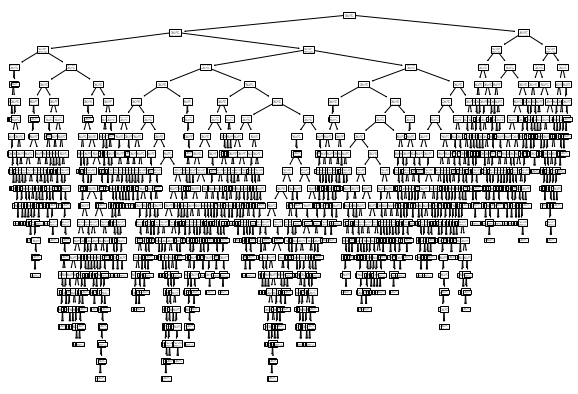

In [14]:
import matplotlib.pyplot as plt # matplotlib 라이브러리에서 pyplot 함수를 불러옴
from sklearn.tree import plot_tree # sklearn 라이브러리에서 plot_tree 함수를 불러옴 

plt.figure(figsize=(10,7)) # 그래프의 크기를 지정
plot_tree(dt) # dt 변수에 저장된 DecisionTreeClassifier 함수를 그래프로 출력
plt.show() # 그래프를 출력

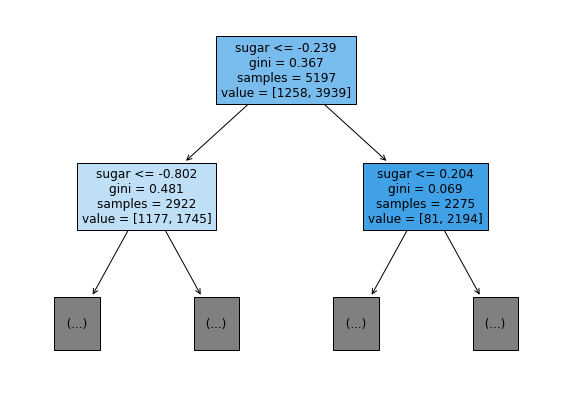

In [15]:
plt.figure(figsize=(10,7)) # 그래프의 크기를 지정 > figsize=(10,7)은 가로 10, 세로 7
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH']) # dt 변수에 저장된 DecisionTreeClassifier 함수를 그래프로 출력 > max_depth=1은 깊이를 1로 제한, filled=True는 색을 채움, feature_names=['alcohol', 'sugar', 'pH']는 특성의 이름을 지정
plt.show() # 그래프를 출력

### 가지치기

In [16]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42) # DecisionTreeClassifier 함수를 dt 변수에 저장 > max_depth=3은 깊이를 3으로 제한 > random_state=42는 랜덤 시드를 42로 지정
dt.fit(train_scaled, train_target) # dt 변수에 저장된 DecisionTreeClassifier 함수에 train_scaled, train_target을 적용하여 훈련

print(dt.score(train_scaled, train_target)) # dt 변수에 저장된 DecisionTreeClassifier 함수에 train_scaled, train_target을 적용하여 점수 출력
print(dt.score(test_scaled, test_target)) # dt 변수에 저장된 DecisionTreeClassifier 함수에 test_scaled, test_target을 적용하여 점수 출력

0.8454877814123533
0.8415384615384616


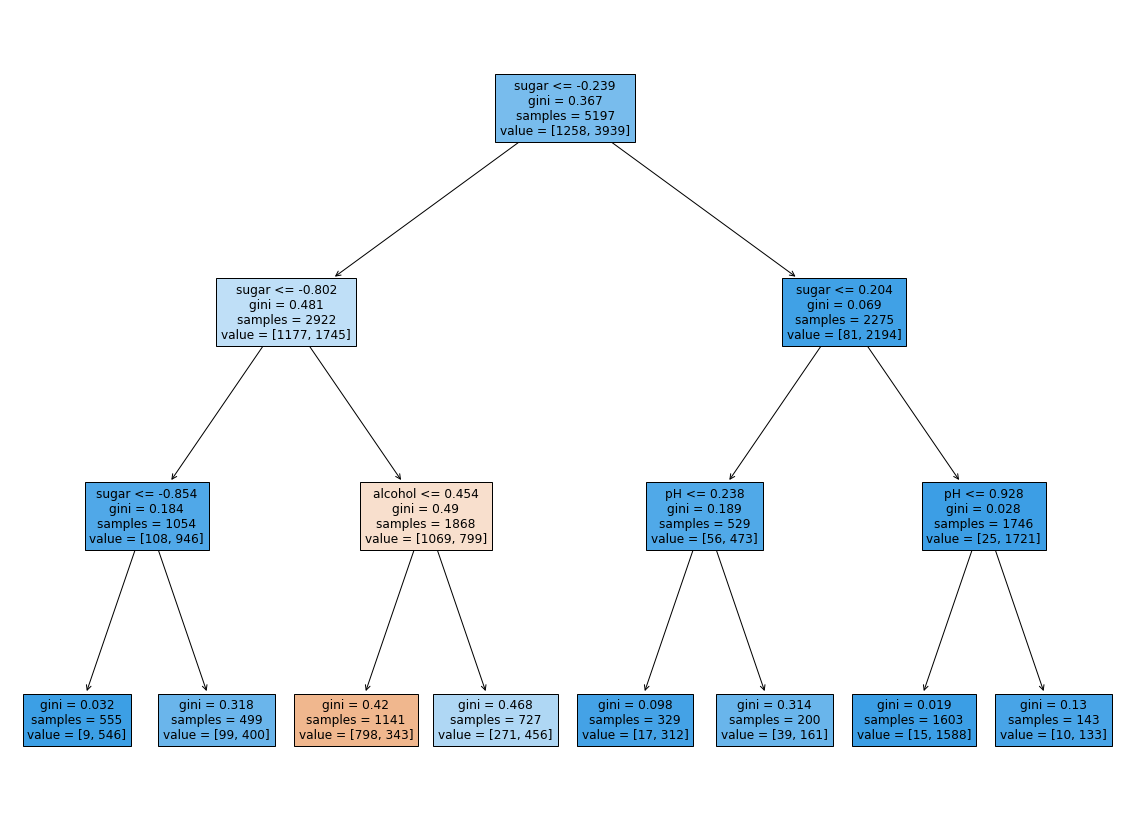

In [16]:
plt.figure(figsize=(20,15)) # 그래프의 크기를 지정 > figsize=(20,15)은 가로 20, 세로 15
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH']) # dt 변수에 저장된 DecisionTreeClassifier 함수를 그래프로 출력 > filled=True는 색을 채움, feature_names=['alcohol', 'sugar', 'pH']는 특성의 이름을 지정
plt.show() # 그래프를 출력

In [17]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42) # DecisionTreeClassifier 함수를 dt 변수에 저장 > max_depth=3은 깊이를 3으로 제한 > random_state=42는 랜덤 시드를 42로 지정
dt.fit(train_input, train_target) # dt 변수에 저장된 DecisionTreeClassifier 함수에 train_input, train_target을 적용하여 훈련

print(dt.score(train_input, train_target)) # dt 변수에 저장된 DecisionTreeClassifier 함수에 train_input, train_target을 적용하여 점수 출력
print(dt.score(test_input, test_target)) # dt 변수에 저장된 DecisionTreeClassifier 함수에 test_input, test_target을 적용하여 점수 출력

0.8454877814123533
0.8415384615384616


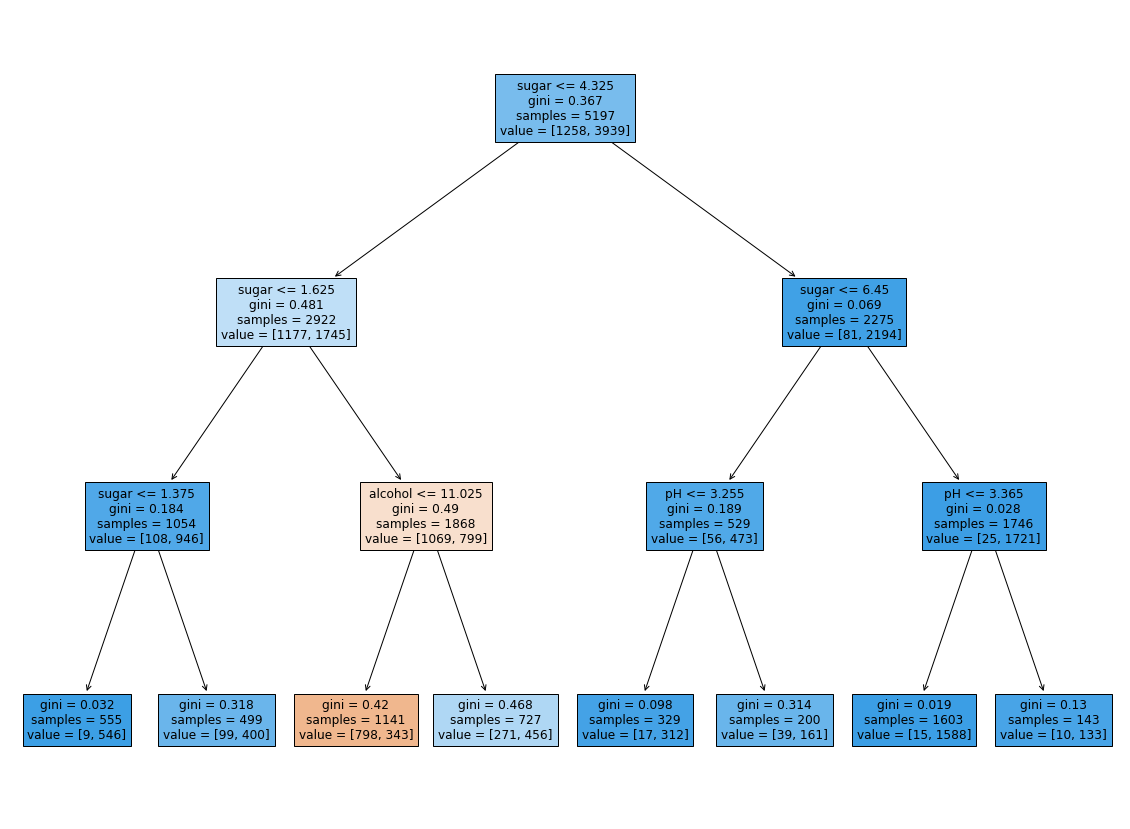

In [18]:
plt.figure(figsize=(20,15)) # 그래프의 크기를 지정 > figsize=(20,15)은 가로 20, 세로 15
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH']) # dt 변수에 저장된 DecisionTreeClassifier 함수를 그래프로 출력 > filled=True는 색을 채움, feature_names=['alcohol', 'sugar', 'pH']는 특성의 이름을 지정
plt.show() # 그래프를 출력

In [19]:
print(dt.feature_importances_) # dt 변수에 저장된 DecisionTreeClassifier 함수의 특성 중요도를 출력

[0.12345626 0.86862934 0.0079144 ]


## 확인문제

In [18]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42) # DecisionTreeClassifier 함수를 dt 변수에 저장 > min_impurity_decrease=0.0005는 불순도 감소 최소값을 0.0005로 지정 > random_state=42는 랜덤 시드를 42로 지정
dt.fit(train_input, train_target) # dt 변수에 저장된 DecisionTreeClassifier 함수에 train_input, train_target을 적용하여 훈련

print(dt.score(train_input, train_target)) # dt 변수에 저장된 DecisionTreeClassifier 함수에 train_input, train_target을 적용하여 점수 출력
print(dt.score(test_input, test_target)) # dt 변수에 저장된 DecisionTreeClassifier 함수에 test_input, test_target을 적용하여 점수 출력

0.8874350586877044
0.8615384615384616


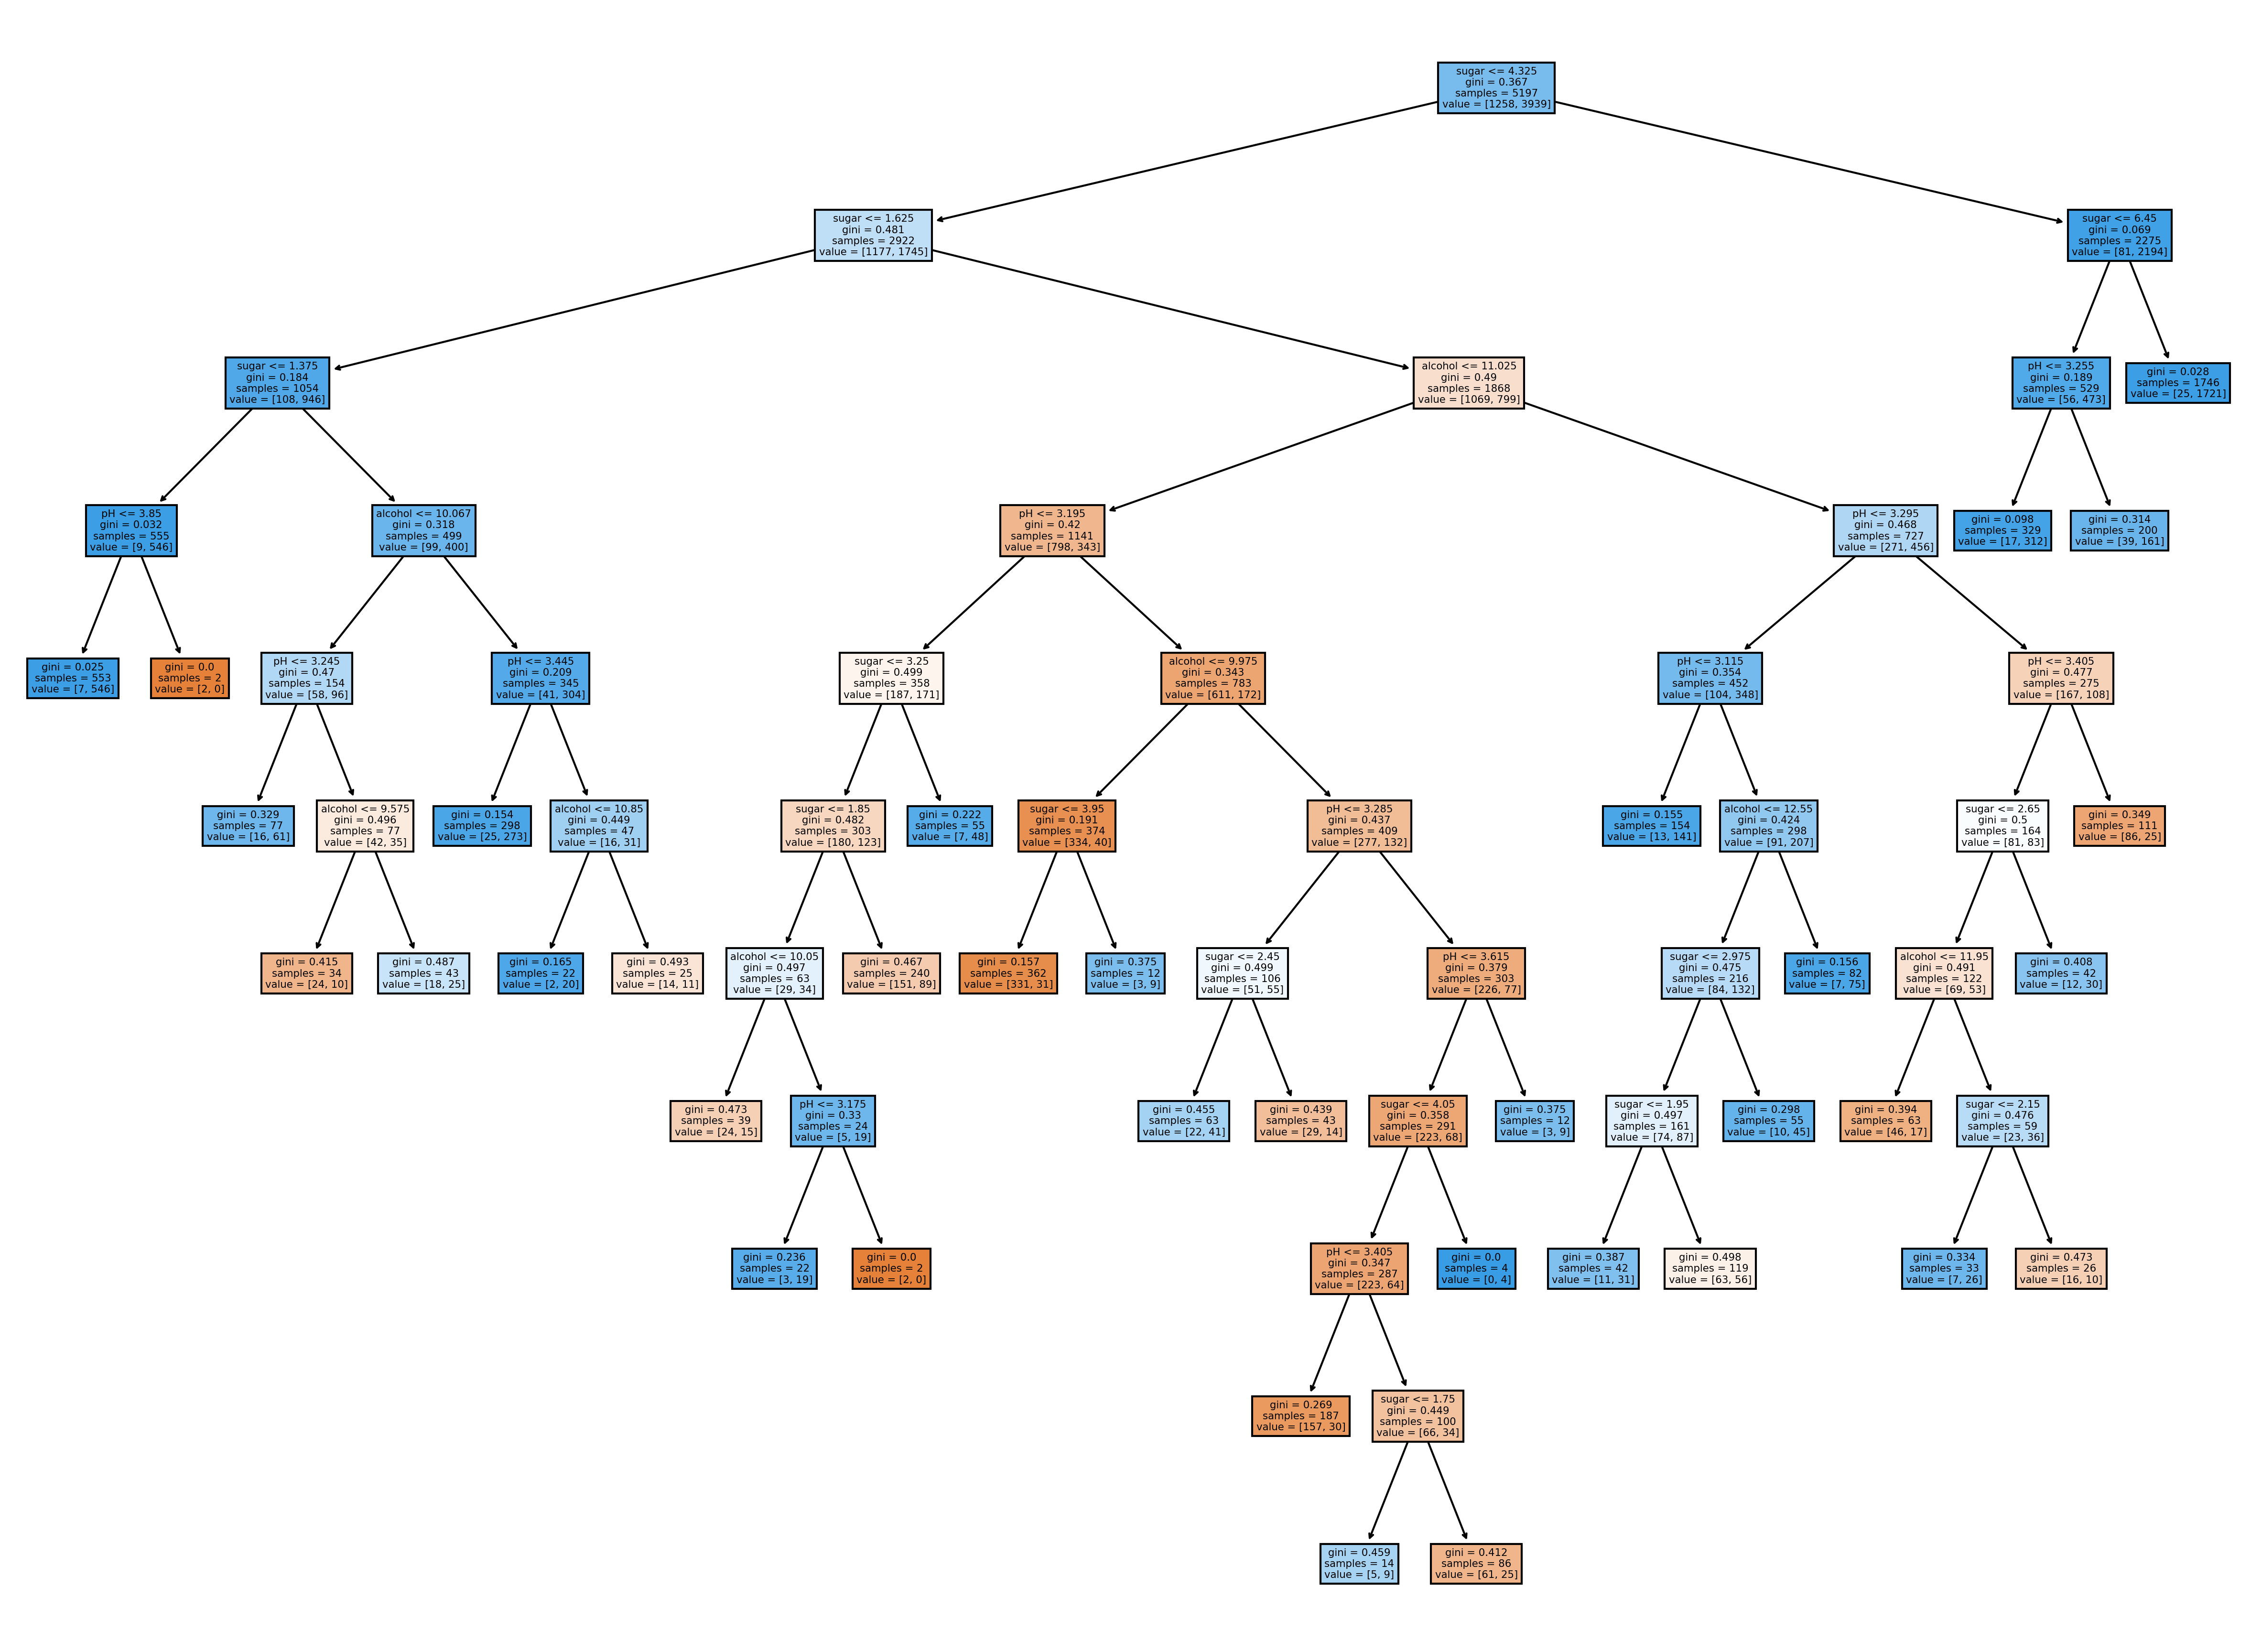

In [56]:
plt.figure(figsize=(20,15), dpi=300) # 그래프의 크기를 지정 > figsize=(20,15)은 가로 20, 세로 15 > dpi=300은 해상도를 300으로 지정
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH']) # dt 변수에 저장된 DecisionTreeClassifier 함수를 그래프로 출력 > filled=True는 색을 채움, feature_names=['alcohol', 'sugar', 'pH']는 특성의 이름을 지정
plt.show() # 그래프를 출력